<h1> Regresja liniowa </h1>

W ramach dzisiejszych zajęć rozważymy najpierw problem uczenia się regresji liniowej w podejściu maximum likelihood (MLE) oraz bayesowskim. W drugiej części nauczymy klasyfikator na tradycyjnym zbiorze cyfr MNIST z użyciem pakietu scikit-learn.

# Przypomnienie

Spojrzenie probabilistyczne

<img width=300 src="figures/L3/frequentists_vs_bayesians.png">

## Przypomnienie

Machine learning jako robienie ``push-up`` rozkładu prior

* P(w) - prior

* P(x | w) - likelihood

* P(w | x) - posterior

Na obrazku powyzej osoba po lewej liczy P(w=0 | x), co nie zawsze jest przydatne.

<img width=400 src="figures/L3/pavel.jpg">

### Przyklad

Źródło: http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter3_MCMC/Ch3_IntroMCMC_PyMC3.ipynb

[Omówienie przykładu na zajęciach]

# Regresja liniowa

Źródło: https://www.cs.ox.ac.uk/people/nando.defreitas/machinelearning/lecture3.pdf

Znamy już świetnie rozkład Gaussa. Podobnie jak w naszych eksperymentach z rzutami monetą, podejście maximum likelihood jest relatywnie proste.

Załóżmy, że dane pochodzą rozkładu normalnego, czyli podobnie jak w przypadku rzutu monetą zakładamy, że:

$$ p(y | x) = N(<x, w>, \sigma^2) = <x, w> + N(0, \sigma^2) $$

Zasada MLE:

$$ \theta^* = argmax \prod_i p(y_i | x_i) $$

[Wyprowadzenie na tablicy wzoru na estymator MLE]

## Funkcje bazowe

In [23]:
import numpy as np
from matplotlib import pyplot as plt

## Cwiczenie 1 (2 pkt)

Dane pochodzą z rozkładu y_i = m*x_i + b + N(0, 1). Na podstawie 101 przykładów z rozkładu policz estymator MLE następującego modelu:

$$ p(y | x) = N(<x, w>, \sigma^2) = <x, w> + N(0, \sigma^2) $$

Kod powinien być opakowany w klase ToyLinearRegression z metodami fit oraz predict.

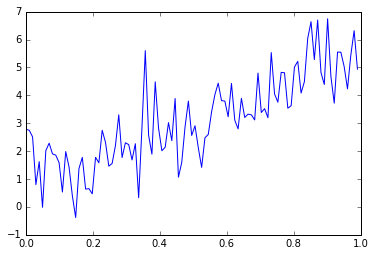

In [28]:
## Syntetyczny zbiór danych
np.random.seed(123456789)

def y(x,m,b,mu=0,sigma=1): 
    return m*x + b + np.random.normal(mu,sigma,1)[0]

N = 101
M = 2
t = np.empty(N)
domain_bound = 1.0/N
domain = np.empty(N)

for i in range(N): 
    domain[i] = i*domain_bound
    
for i in range(N): 
    t[i] = y(x=domain[i],m=4.89,b=0.57)

plt.plot(domain,t)

w1= [ 0.88610652  4.47519348]
w2= [ 0.88610652  4.47519348]


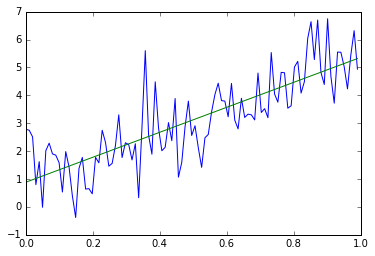

In [27]:
#in order to compare between examples, set a seed in random
phi = np.array([np.ones(N),domain]).T

temp1 = np.linalg.inv(np.dot(phi.T,phi)) #inverse of phi.T X phi
temp2 = np.dot(temp1, phi.T)

w1 = np.dot(temp2,t) #solution
print 'w1=',w1

#assuming that phi.T X phi was not invertible we could find the pseudo inverse using the pinv function
#we expect to obtain the same solution
phi_pi = np.linalg.pinv(phi)
w2 = np.dot(phi_pi,t)
print 'w2=',w2
#compute the model predicted values for the training data domain
predicted_t = [w2[0]+w2[1]*x for x in domain]
plt.plot(domain,t)
plt.plot(domain,predicted_t)
plt.show()

# Bayesowska regresja liniowa

Załóżmy dodatkowo prior na wagi rozkładu normalnego

## Cwiczenie 2 (3 pkt)

W ostatnim zadaniu stworzyliśmy klasę ToyLinearRegression. W tym ćwiczeniu Twoim zadaniem jest stworzenie klasy ToyBayesianMCLinearRegression, która sfituje model bayesowskiej regresji liniowej z wykorzystaniem metody Monte Carlo (jak w zadaniu z Monty Hall).

## Cwiczenie 3 (1 pkt)

W ostatnim zadaniu stworzyliśmy klasę ToyLinearRegression. W tym ćwiczeniu Twoim zadaniem jest stworzenie klasy ToyBayesianLinearRegression, która sfituje model bayesowskiej regresji liniowej z wykorzystaniem dokładnych wzorów na posterior. 